# Social, Political and Economic Event Database(SPEED)

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("SPEED.csv").convert_dtypes()

### Rows and columns 

In [4]:
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 58725, Columns: 9


In [5]:
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce').dt.date
df = df.convert_dtypes()
df = df.set_index(['date']).sort_index()
df = df.drop(columns=['yearmon'])

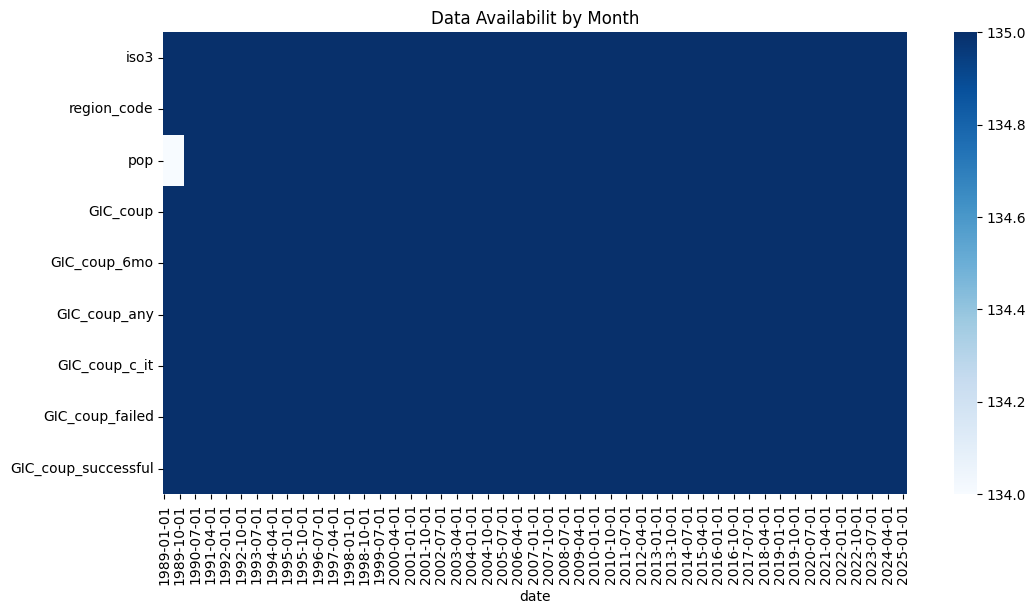

In [ ]:
missing_by_month = df.groupby('date').count()
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert 'yearmon' to datetime format
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce')

# Step 2: Drop rows before 2001
df = df[df['date'] >= pd.to_datetime('2001-01-01')]

# Step 3: Set 'date' as index
df = df.set_index('date').sort_index()

# Step 4: Drop the original 'yearmon' column (optional)
df = df.drop(columns=['yearmon'])

# Step 5: Group by month and count non-null values
missing_by_month = df.groupby(pd.Grouper(freq='M')).count()

# Step 6: Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues', cbar_kws={'label': 'Non-null Count'})
plt.title('📅 Data Availability by Month (Post-2001)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()


### Sample data and features

In [6]:
df.tail().T

date,2025-03-01,2025-03-01,2025-03-01,2025-03-01,2025-03-01
iso3,BLZ,TUV,ZMB,TUN,ZWE
region_code,LAC,EAP,SSA,MNA,SSA
pop,411106.0,9816.0,20723965.0,12200431.0,16340822.0
SPEED_MASS_EXPRESS,<NA>,<NA>,<NA>,<NA>,<NA>
SPEED_POL_EXPRESS,<NA>,<NA>,<NA>,<NA>,<NA>
SPEED_POL_VIOL,<NA>,<NA>,<NA>,<NA>,<NA>
SPEED_ST_REPRESS,<NA>,<NA>,<NA>,<NA>,<NA>
SPEED_STAT_VIOL,<NA>,<NA>,<NA>,<NA>,<NA>


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58725 entries, 1989-01-01 to 2025-03-01
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   iso3                58725 non-null  string 
 1   region_code         58725 non-null  string 
 2   pop                 58713 non-null  Float64
 3   SPEED_MASS_EXPRESS  1323 non-null   Int64  
 4   SPEED_POL_EXPRESS   1323 non-null   Int64  
 5   SPEED_POL_VIOL      1323 non-null   Int64  
 6   SPEED_ST_REPRESS    1323 non-null   Int64  
 7   SPEED_STAT_VIOL     1323 non-null   Int64  
dtypes: Float64(1), Int64(5), string(2)
memory usage: 4.4+ MB


### Descriptive statistics of categorical columns

In [8]:
df.describe(include='string').T

,count,unique,top,freq
iso3,58725,135,AFG,435
region_code,58725,6,SSA,20445


### Descriptive statistics of numerical columns

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pop,58713.0,41259533.486332,153319719.021372,8662.0,2108617.0,8303151.0,25698326.0,1438069596.0
SPEED_MASS_EXPRESS,1323.0,0.031746,0.175389,0.0,0.0,0.0,0.0,1.0
SPEED_POL_EXPRESS,1323.0,0.088435,0.284034,0.0,0.0,0.0,0.0,1.0
SPEED_POL_VIOL,1323.0,0.342404,0.474693,0.0,0.0,0.0,1.0,1.0
SPEED_ST_REPRESS,1323.0,0.12774,0.333926,0.0,0.0,0.0,0.0,1.0
SPEED_STAT_VIOL,1323.0,0.081633,0.273908,0.0,0.0,0.0,0.0,1.0


### Deatils of missing values in the features

In [10]:
total_rows = len(df)
missing_count = df.isnull().sum()
missing_percent = (missing_count / total_rows * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage (%)': missing_percent})
missing_df = missing_df.sort_values(by='Missing Percentage (%)', ascending=False)
missing_df

,Missing Count,Missing Percentage (%)
SPEED_MASS_EXPRESS,57402,97.75
SPEED_ST_REPRESS,57402,97.75
SPEED_POL_VIOL,57402,97.75
SPEED_POL_EXPRESS,57402,97.75
SPEED_STAT_VIOL,57402,97.75
pop,12,0.02
iso3,0,0.00
region_code,0,0.00


In [11]:
columns = missing_df[missing_df['Missing Percentage (%)'] < 70].index
df = df[columns]

numeric_df = df.select_dtypes(include=['number']).dropna()


In [12]:
missing_by_iso3 = df.groupby('iso3').count()
missing_by_month = df.groupby('date').count()

### Availability of data by country

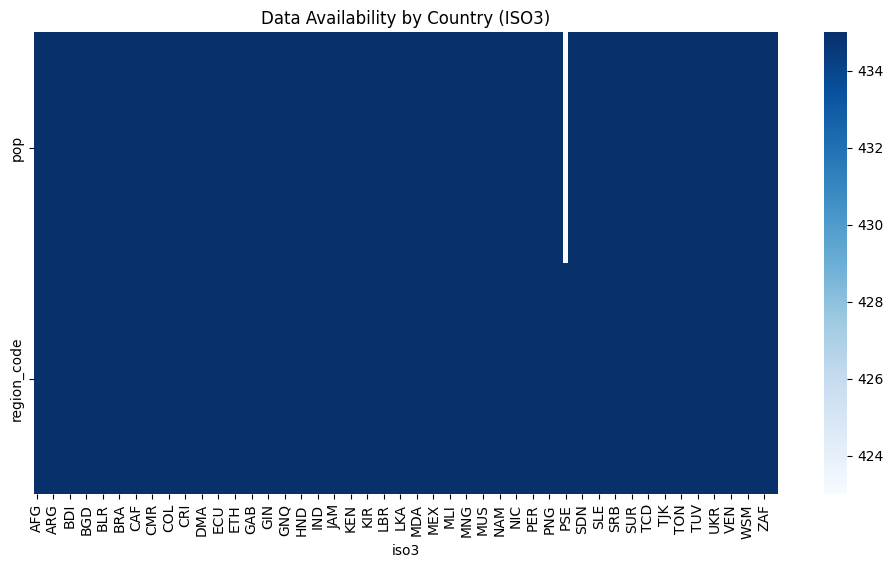

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_iso3.astype(float).T, cmap='Blues')
plt.title('Data Availability by Country (ISO3)')
plt.show()

### Availability of data by month

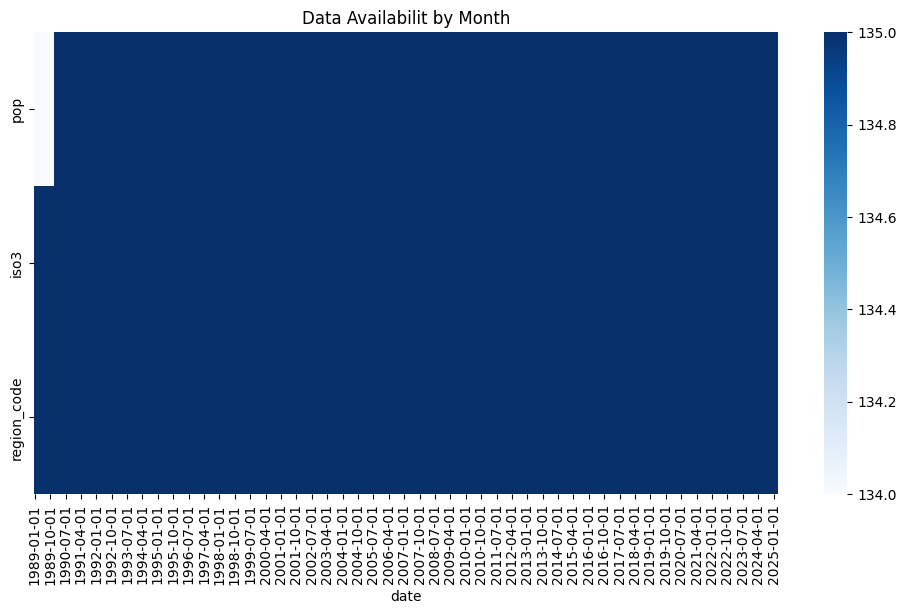

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

In [15]:
#Correlation Matrix
correlation_matrix_df = numeric_df.corr(method='pearson')

### Correlation between the features

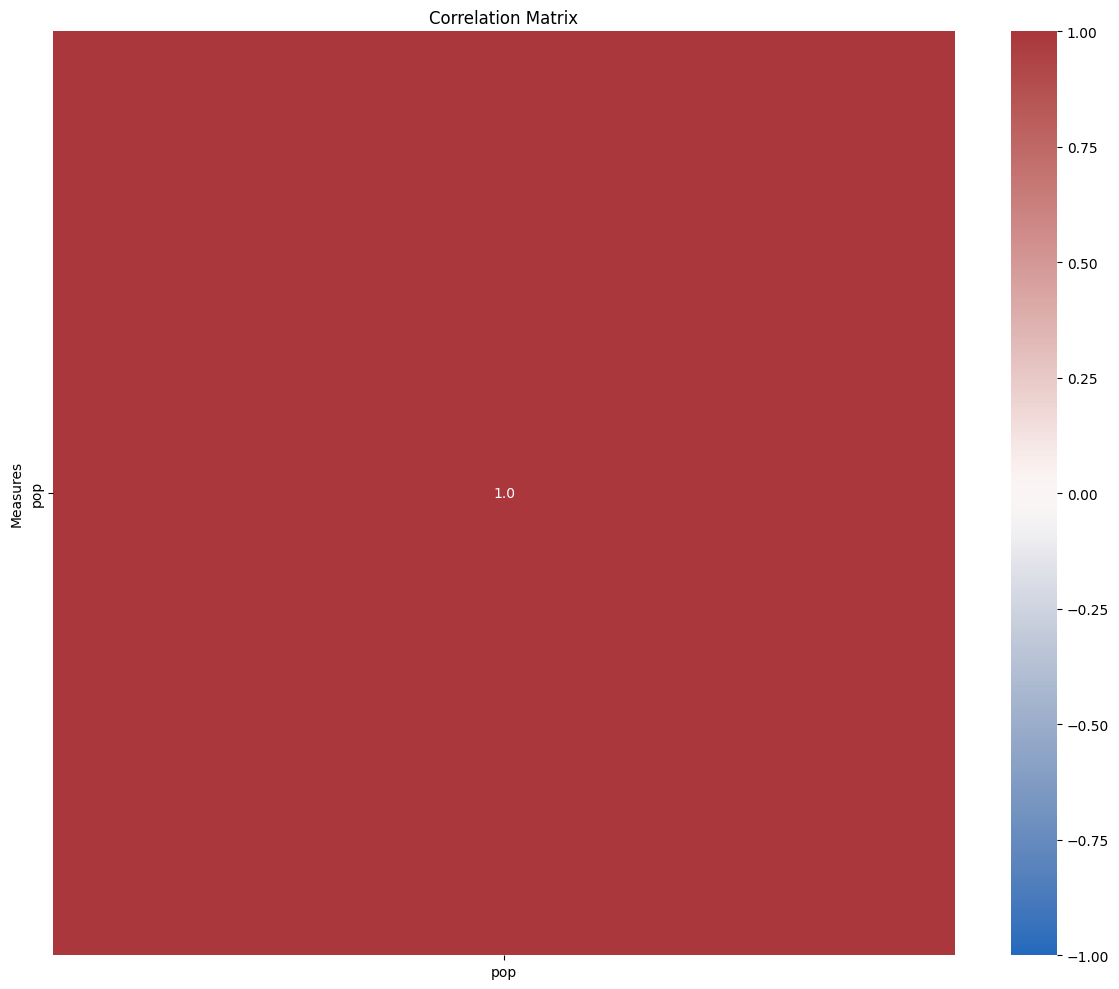

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

In [17]:
numeric_df.shape

(58713, 1)

### Since, columns are dropped due to missing values, no further PCA is possible 